<h1> Description of the given Dataframes</h1>
This notebook contains the exploratory data analysis (EDA) for the Praxisprojekt1. The goal is to understand the structure, quality, and content anomalies of the book and review data.

In [22]:
# Imports and general settings:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# load Dataframes
path_one = r"C:\Entwicklung\Praxisprojekt1\Data\books_data.csv"
path_two = r"C:\Entwicklung\Praxisprojekt1\Data\Books_rating.csv"

# alternative approaches to the data - be aware that this might take some time as especially the first file is large. Also be aware that it might take a lot of resources (RAM)
# path_one = "https://cloudstore.uni-ulm.de/s/eZXxbTDqFE7FFPY/download"
# path_two = "https://cloudstore.uni-ulm.de/s/Aszeq7R3feDenji/download"

# attach to variables
df1 = pd.read_csv(path_one)
df2 = pd.read_csv(path_two)

In [3]:
# first general plot of df1
df1

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0


In [4]:
# first general plot of df2
df2

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...
2999995,B000NSLVCU,The Idea of History,NaN,NaN,NaN,14/19,4.0,937612800,Difficult,"This is an extremely difficult book to digest,..."
2999996,B000NSLVCU,The Idea of History,NaN,A1SMUB9ASL5L9Y,jafrank,1/1,4.0,1331683200,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2999997,B000NSLVCU,The Idea of History,NaN,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",0/0,4.0,1180224000,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."
2999998,B000NSLVCU,The Idea of History,NaN,A18SQGYBKS852K,"Julia A. Klein ""knitting rat""",1/11,5.0,1163030400,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,..."


In [5]:
# statistical description of df1
df1.describe()

,ratingsCount
count,49752.000000
mean,21.252975
std,201.340431
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,4895.000000


In [6]:
# statistical description of df2
df2.describe()

,Price,review/score,review/time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


In [7]:
# description of the columns of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [8]:
# description of the columns of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [9]:
# counting NULL-values per column in df1
df1.isnull().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [10]:
# counting NULL-values per column in df2
df2.isnull().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [11]:
# in this section we will take a closer look at the NULL-values per df. We will not only express the absolut value of missing values, additionally we will express their relative share in regard to their column. The Output will be sorted after relative share descending.

# create variables for rows and columns for both df's
num1_rows, num1_cols = df1.shape
num2_rows, num2_cols = df2.shape

# create variables to count missing values per df
missing_values1 = df1.isnull().sum()
missing_values2 = df2.isnull().sum()

# condition and variable to count missing values per row per df
columns_with_missing1 = missing_values1[missing_values1 > 0]
columns_with_missing2 = missing_values2[missing_values2 > 0]

# create variable to count the total missing values per row per df
total_missing_values1 = df1.isnull().sum().sum()
total_missing_values2 = df2.isnull().sum().sum()

# create if-else condition, two loops iterating over both df's, separated by a "----" line
if columns_with_missing1.empty:
    print("No missing values")
else:
    print("Missing values for df1")
    columns_with_missing1 = columns_with_missing1.sort_values(ascending=False)

    for column, count in columns_with_missing1.items():
        percentage1 = count / num1_rows * 100
        print(f" Column {column}: {count} missing Values {percentage1:.2f}%")

    print(f"df1 has a total of {total_missing_values1:.2f} missing values")
    print("----------------------")
    print("Missing values for df2")
    columns_with_missing2 = columns_with_missing2.sort_values(ascending=False)
    for column, count in columns_with_missing2.items():
        percentage2 = count / num2_rows * 100
        print(f" Column {column}: {count} missing Values {percentage2:.2f}%")

    print(f"df2 has a total of {total_missing_values2:.2f} missing values")

Missing values for df1
 Column ratingsCount: 162652 missing Values 76.58%
 Column publisher: 75886 missing Values 35.73%
 Column description: 68442 missing Values 32.22%
 Column image: 52075 missing Values 24.52%
 Column categories: 41199 missing Values 19.40%
 Column authors: 31413 missing Values 14.79%
 Column publishedDate: 25305 missing Values 11.91%
 Column previewLink: 23836 missing Values 11.22%
 Column infoLink: 23836 missing Values 11.22%
 Column Title: 1 missing Values 0.00%
df1 has a total of 504645.00 missing values
----------------------
Missing values for df2
 Column Price: 2518829 missing Values 83.96%
 Column profileName: 561905 missing Values 18.73%
 Column User_id: 561787 missing Values 18.73%
 Column review/summary: 407 missing Values 0.01%
 Column Title: 208 missing Values 0.01%
 Column review/text: 8 missing Values 0.00%
df2 has a total of 3643144.00 missing values


In [12]:
# In this section feature engineering will be completed to improve quality of given data in order to improve further analysis

# for df 1 the column "publishedDate" is transformed into a real Datetime-Format
# 'errors=coerce' values errors as NaT (Not a Time)
df1['publishedDate_clean'] = pd.to_datetime(df1['publishedDate'], errors='coerce')
df1['publishedYear'] = df1['publishedDate_clean'].dt.year

# for df2 the "Unix-Timestamp" is being transformed into a readable date-format
df2['review_datetime'] = pd.to_datetime(df2['review/time'], unit='s')
df2['review_year'] = df2['review_datetime'].dt.year
df2['review_month'] = df2['review_datetime'].dt.month

# calculate the length of text (count figures), filling NaN with empty Strings to prevent Errors
df2['review_length'] = df2['review/text'].fillna('').astype(str).apply(len)

# splitting "Helpfulness" using String-Operations
helpfulness_split = df2['review/helpfulness'].str.split('/', expand=True)
df2['helpful_votes'] = pd.to_numeric(helpfulness_split[0], errors='coerce')
df2['total_votes'] = pd.to_numeric(helpfulness_split[1], errors='coerce')

# Calculating Ratio, to prevent dividing by 0. If total_votes = 0, value for Ratio = 0 (NaN)
df2['helpfulness_ratio'] = df2.apply(lambda row: row['helpful_votes'] / row['total_votes'] if row['total_votes'] > 0 else 0, axis=1)

# Feedback
print("Feature Engineering completed!")

Feature Engineering completed!


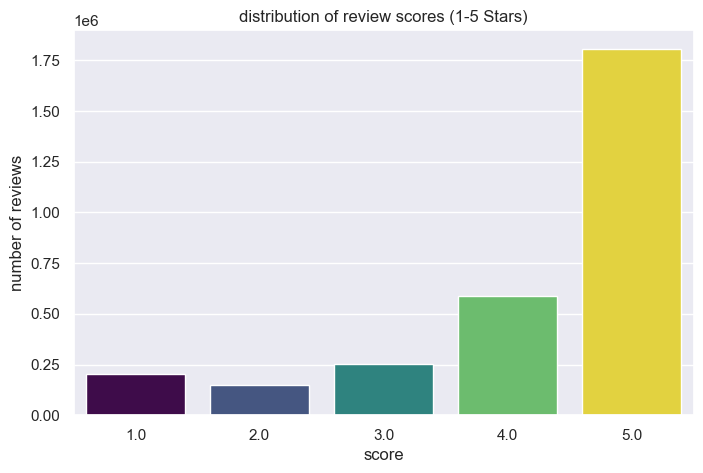

In [15]:
# creating a plot showing the distribution of review scores

# determining plot size
plt.figure(figsize=(8, 5))

# creating plot content as well as plot description
sns.countplot(x='review/score', data=df2, palette='viridis', hue='review/score', legend=False)
plt.title('distribution of review scores (1-5 Stars)')
plt.xlabel('score')
plt.ylabel('number of reviews')
plt.show()

### Interpretation: Distribution of ratings
The bar chart shows a classic **“J curve”**:
* **Dominance of positive ratings:** The overwhelming majority of users give 5 stars. This is typical for online platforms, where users tend to rate products they love.
* **Little mediocrity:** Ratings of 2, 3, or 4 stars are comparatively rare. Users tend toward extreme opinions (very good or very bad).

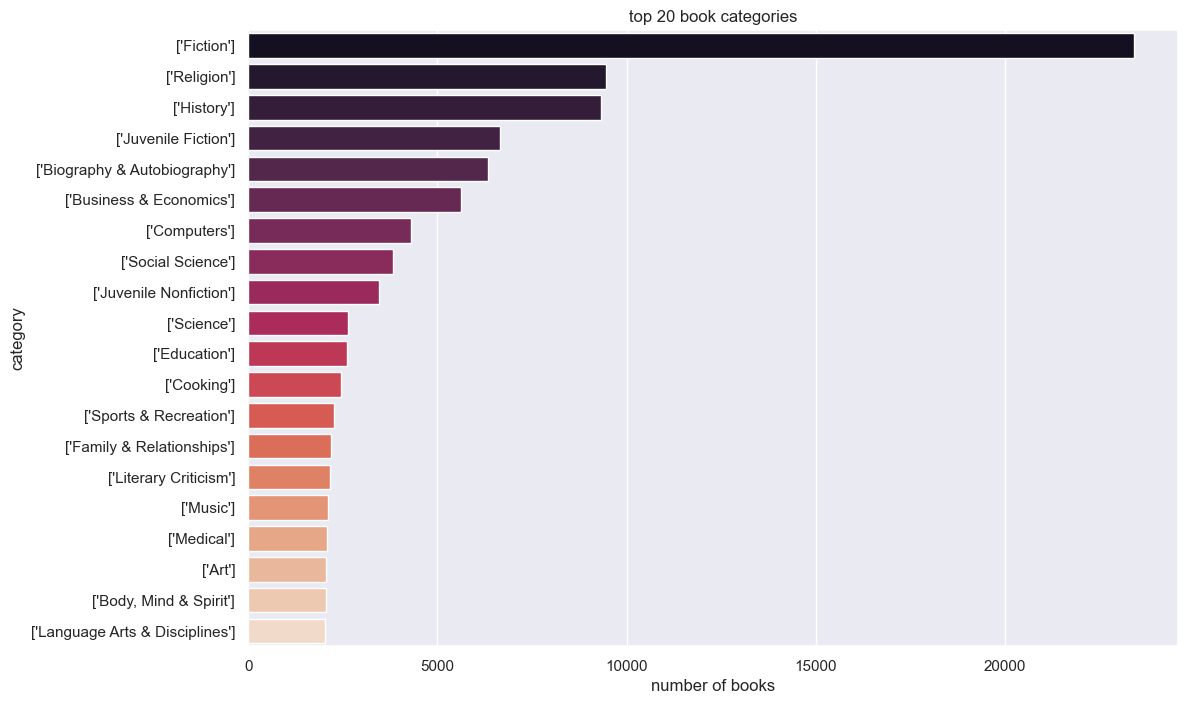

In [16]:
# creating a second plot showing the quantity of the top 20 categories

# creating and attaching the values for the top 20 categories
top_categories = df1['categories'].value_counts().head(20)

# creating plot content as well as plot description
plt.figure(figsize=(12, 8))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='rocket', hue=top_categories.index, legend=False)
plt.title('top 20 book categories')
plt.xlabel('number of books')
plt.ylabel('category')
plt.show()

### Interpretation: Top categories
* **Fiction dominates:** The “Fiction” category is by far the most common.
* **Data quality:** It is noticeable that some categories may be redundant (e.g., “Juvenile Fiction” alongside “Fiction”). For later, more in-depth analyses, it may be useful to clean up or summarize these categories to avoid distortions.

final super categories: ['American', '(Fictitious', 'Character)', 'Fiction', 'Literature', 'County', 'Language', 'Stories', 'Poetry', 'English', 'Cooking', 'Children', 'African', 'Women', 'Battle']


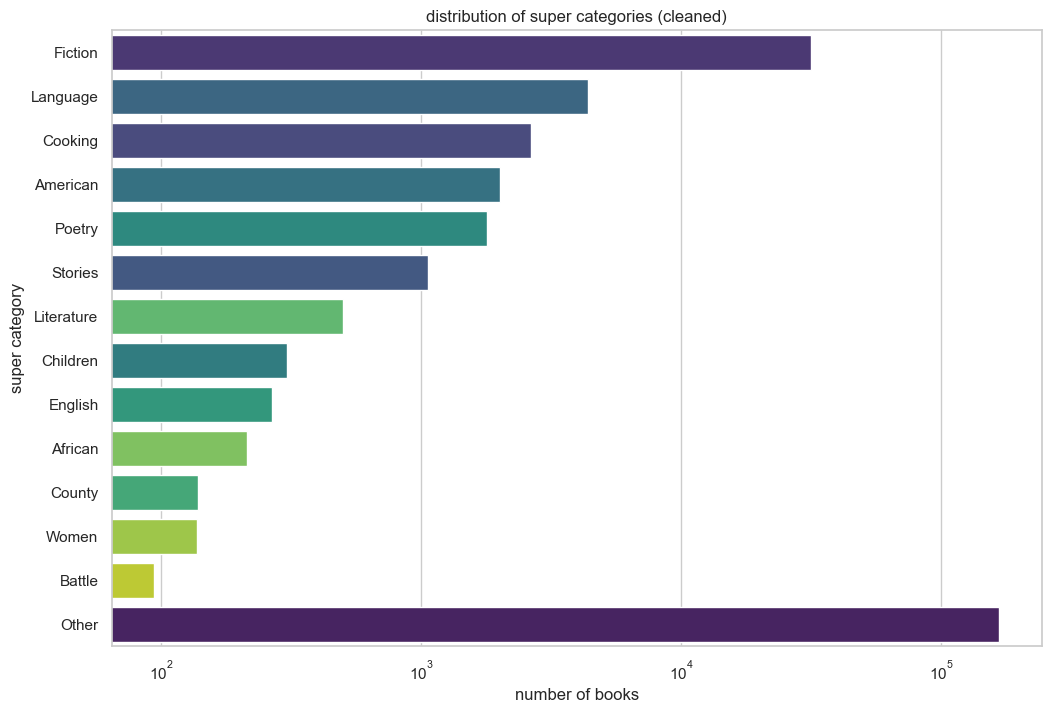

In [11]:
# in this section we will take a more general look at the categories and build super-categories based on the most common keywords

# create function to clean category strings
def clean_cat_string(cat_str):
    if pd.isna(cat_str): return ""
    # remove brackets and quotes, convert to lowercase
    return re.sub(r"[\[\]']", "", str(cat_str)).strip().lower()

# collect all words from categories
all_words = []
unique_categories = df1['categories'].dropna().unique()
for cat in unique_categories:
    words = re.split(r'[ ,&]+', clean_cat_string(cat))
    all_words.extend([w.title() for w in words if len(w) > 3])

# find top 20 keywords
top_keywords = [word for word, count in Counter(all_words).most_common(20)]

# clean keywords by removing generic ones
keywords_to_ignore = ['General', 'Books', 'Works', 'Library']
top_keywords = [k for k in top_keywords if k not in keywords_to_ignore]

# take final top 15 keywords
top_keywords = top_keywords[:15]
print("final super categories:", top_keywords)

# create mapping
auto_mapping = {}
for cat in unique_categories:
    cleaned_original = clean_cat_string(cat)
    found_keyword = None
    for keyword in top_keywords:
        if re.search(r'\b' + re.escape(keyword.lower()) + r'\b', cleaned_original):
             found_keyword = keyword
             break

    if found_keyword:
        auto_mapping[cat] = found_keyword

# apply and plot the chart as well as describe it
df1['super_category'] = df1['categories'].map(auto_mapping).fillna('Other')

plt.figure(figsize=(12, 8))
order = df1['super_category'].value_counts().index
# as "other" is the most dominant, we do not want to hide it but place it at the end
order = [o for o in order if o != 'Other'] + ['Other']

sns.countplot(y='super_category', data=df1, order=order, palette='viridis', hue='super_category', legend=False)
plt.title('distribution of super categories (cleaned)')
plt.xlabel('number of books')
plt.ylabel('super category')
plt.xscale('log')
plt.show()

### Interpretation: Distribution of adjusted supercategories
The bar chart shows the number of books per summarized “supercategory.”
* **Note on the scale:** Due to the extreme differences in frequency, a **logarithmic scale** is used on the x-axis. Each main bar represents a tenfold increase in quantity (1,000, 10,000, 100,000).
* **Dominance of fiction:** Even after adjustment, “fiction” remains by far the largest category, almost an order of magnitude (factor of 10) more frequent than the next largest categories.
* **Diversity in the “long tail”:** The summary now also reveals medium-sized genres such as “History,” “Religion,” and “Biography,” which were previously fragmented into many subcategories. The “Other” category collects all books that could not be assigned to any of the top 15 keywords.

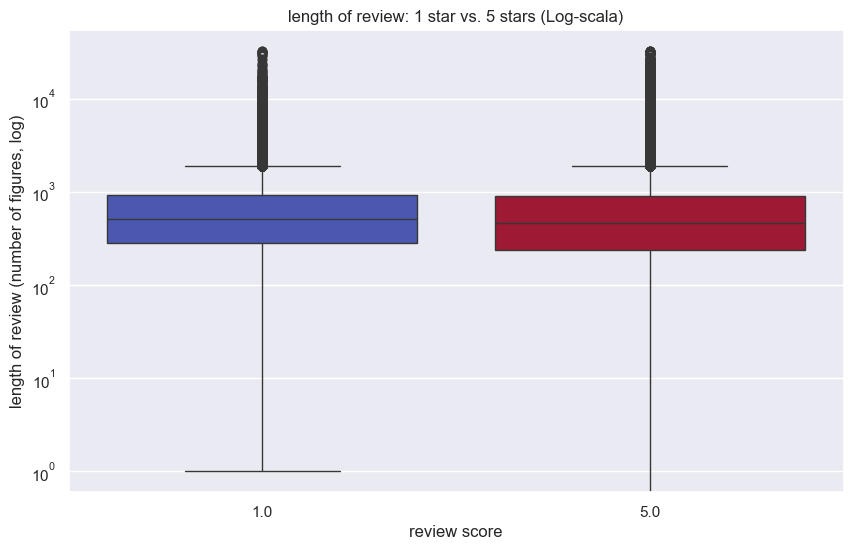

In [17]:
# creating a third plot, comparing the length of good and bad reviews

# extracting the "extreme" ratings
df_extreme = df2[df2['review/score'].isin([1.0, 5.0])].copy()

plt.figure(figsize=(10, 6))
# creating plot content as well as plot description
sns.boxplot(x='review/score', y='review_length', data=df_extreme, palette='coolwarm', hue='review/score', legend=False)
plt.yscale('log')
plt.title('length of review: 1 star vs. 5 stars (Log-scala)')
plt.xlabel('review score')
plt.ylabel('length of review (number of figures, log)')
plt.show()

### Interpretation: Review length by rating
Contrary to the intuitive assumption that dissatisfied users write longer “angry rants,” the box plot shows:
* **Similar length:** The average text length (median) is nearly identical for 1-star and 5-star ratings.
* **High variance:** In both groups, there are extreme outliers at the top (very long reviews), which is visible on the logarithmic scale. The rating alone therefore provides little indication of the length of the feedback.

the very first review was contributed: 1969-12-31 23:59:59
the last review was contributed: 2013-03-04 00:00:00
--------------------------------------------------
reviews before 1990: 21
reviews after 1990: 2999979
--------------------------------------------------
due to the small number of reviews before 1990, the timeline will begin in 1990 and end in 2014, as there are no more recent reviews
--------------------------------------------------


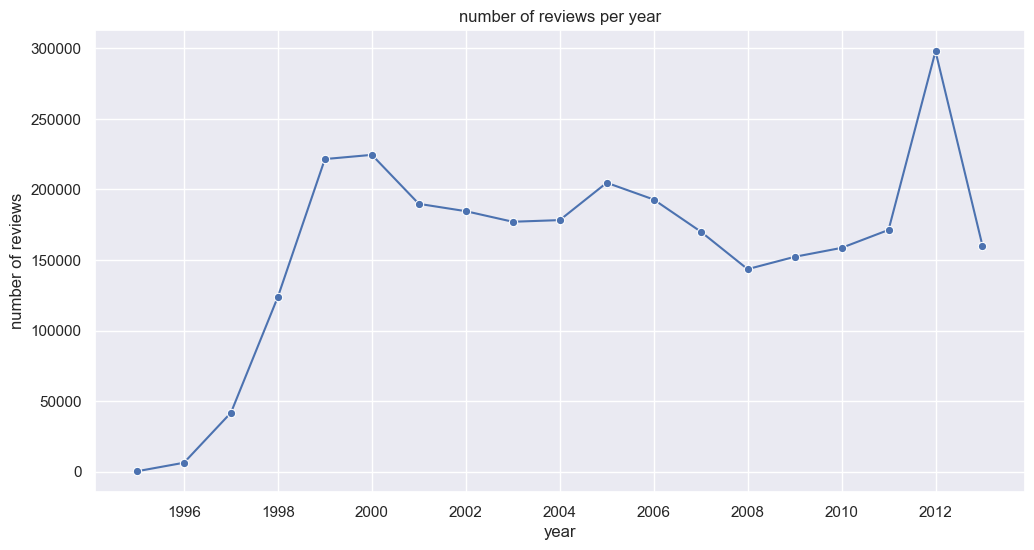

In [18]:
# creating another plot showing the contribution of reviews per year

# determining the first and the last contributed review
first_review_date = df2['review_datetime'].min()
last_review_date = df2['review_datetime'].max()

# filtering border-values
print(f"the very first review was contributed: {first_review_date}")
print(f"the last review was contributed: {last_review_date}")
print("-" * 50)
print(f"reviews before 1990: {df2[df2['review_year'] < 1990].shape[0]}")
print(f"reviews after 1990: {df2[df2['review_year'] >= 1990].shape[0]}")
print("-" * 50)
print("due to the small number of reviews before 1990, the timeline will begin in 1990 and end in 2014, as there are no more recent reviews")
print("-" * 50)

# count reviews per year
reviews_per_year = df2['review_year'].value_counts().sort_index()

# setting borders for the plot
reviews_per_year = reviews_per_year[(reviews_per_year.index > 1990) & (reviews_per_year.index < 2014)]

# creating plot content as well as plot description
plt.figure(figsize=(12, 6))
sns.lineplot(x=reviews_per_year.index, y=reviews_per_year.values, marker='o', color='b')
plt.title('number of reviews per year')
plt.xlabel('year')
plt.ylabel('number of reviews')
plt.grid(True)

# using only integer
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

### Interpretation: Temporal progression
The time series shows interesting anomalies:
* **Explosive increase:** From the end of the 1990s (beginning of the e-commerce boom), the number of reviews rose exponentially.
* **Possible data errors:** The sharp decline after 2000 and the extreme peak around 2012/2013 strongly indicate artifacts in the data collection (e.g., mass import of old data at a specific point in time). This should be critically considered in time-based analyses (“data drift”).

number of unique user: 1008972
user with most reviews wrote: 5795 reviews
average reviews per user: 2.42


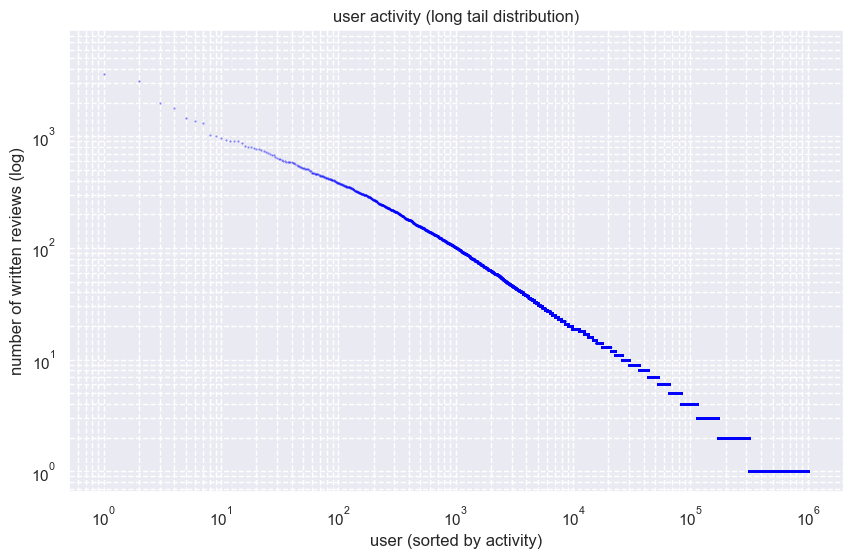

In [19]:
# the following plot will show how many reviews are being created per user

# count number of user
user_activity = df2['User_id'].value_counts()

print(f"number of unique user: {len(user_activity)}")
print(f"user with most reviews wrote: {user_activity.max()} reviews")
print(f"average reviews per user: {user_activity.mean():.2f}")

# creating plot (using log-log plot) content as well as plot description
plt.figure(figsize=(10, 6))
# plotting sorted activities
plt.plot(user_activity.values, color='blue', marker='.', linestyle='none', markersize=1, alpha=0.5)
plt.yscale('log')  # log scala for y
plt.xscale('log')  # log scala for x
plt.title('user activity (long tail distribution)')
plt.xlabel('user (sorted by activity)')
plt.ylabel('number of written reviews (log)')
plt.grid(True, which="both", ls="--")
plt.show()

### Interpretation: User activity (power law)
The plot on logarithmic scales reveals a **Pareto distribution (long tail)**:
* **Few power users:** A tiny number of extremely active users write thousands of reviews.
* **The silent majority:** The vast majority of users have only submitted one to five reviews.
* **Consequence:** The data set is strongly influenced by the opinions of a small group of “super users.”

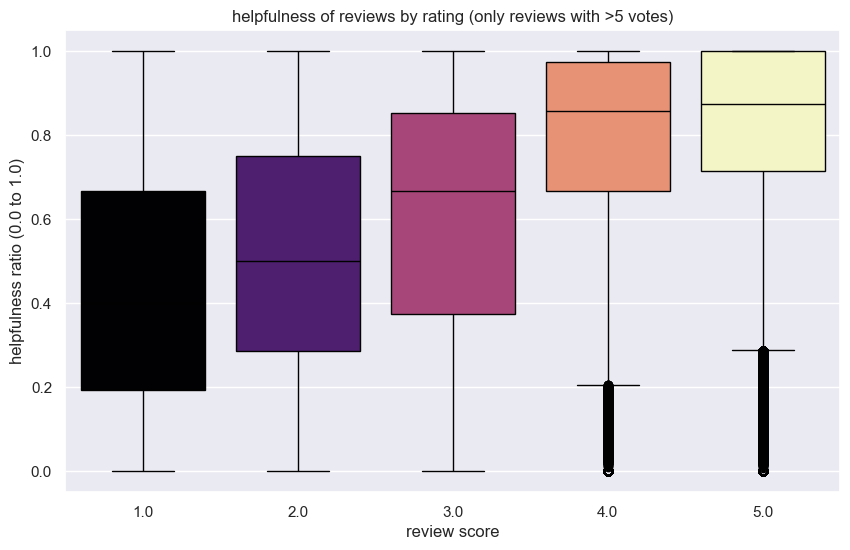

In [20]:
# this plot will show how useful reviews are

# only looking at reviews with total_votes > 0 otherwise the ratio will be 0
df_helpful = df2[df2['total_votes'] > 5].copy() # Mindestens 5 Votes für Relevanz

# creating plot content as well as plot description
plt.figure(figsize=(10, 6))
sns.boxplot(x='review/score', y='helpfulness_ratio', data=df_helpful, palette='magma', hue='review/score', legend=False)
plt.title('helpfulness of reviews by rating (only reviews with >5 votes)')
plt.xlabel('review score')
plt.ylabel('helpfulness ratio (0.0 to 1.0)')
plt.show()

### Interpretation: Helpfulness of reviews
A very revealing result:
* **Positive = Helpful:** 5-star reviews are perceived by the community as significantly more helpful on average (helpfulness ratio close to 1.0).
* **Criticism is less popular:** 1-star reviews have a much wider spread and a lower median helpfulness rating. Users seem to value constructive affirmation more than pure criticism.

create wordcloud for 1 star reviews...


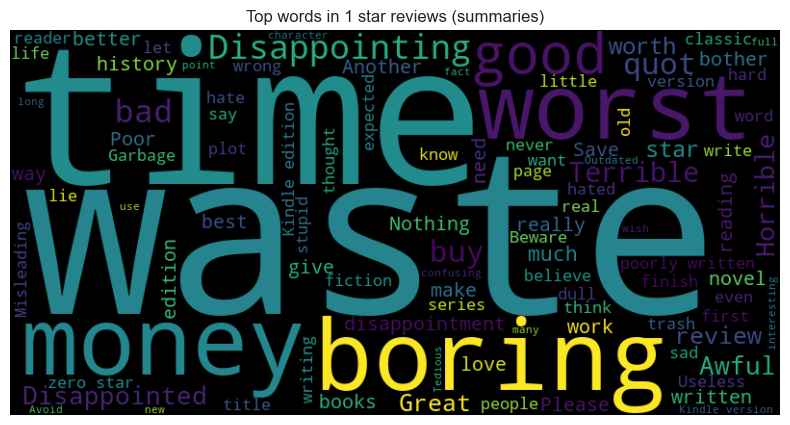

create wordcloud for 5 star reviews...


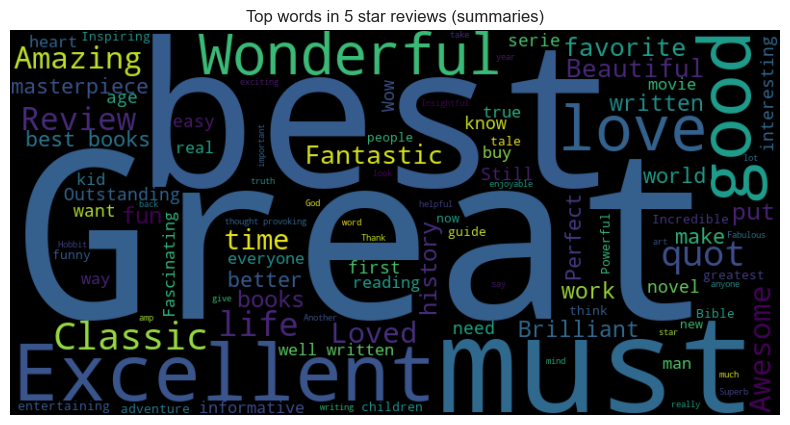

In [28]:
# in this plot, word-clouds were created to show the most used words in extreme reviews

# creating a stopword list, which filters out certain keywords like ("the", "a", "is", etc.)
my_stopwords = set(STOPWORDS)
# further updating the list
my_stopwords.update(["book", "read", "one", "will", "story", "author"])

# function to create wordclouds
def plot_wordcloud(text_data, title):

    # iterating over all reviews
    full_text = " ".join(text_data.dropna().astype(str))

    wc = WordCloud(background_color='black',
                   stopwords=my_stopwords,
                   width=800, height=400,
                   max_words=100,
                   colormap='viridis').generate(full_text)

    # creating plot content as well as plot description
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

print("create wordcloud for 1 star reviews...")
plot_wordcloud(df2[df2['review/score'] == 1.0]['review/summary'], 'Top words in 1 star reviews (summaries)')

print("create wordcloud for 5 star reviews...")
plot_wordcloud(df2[df2['review/score'] == 5.0]['review/summary'], 'Top words in 5 star reviews (summaries)')

### Interpretation: Content analysis (word clouds)
The most frequently used terms confirm the quantitative assessment:
* **1 star:** Dominated by disappointment (“boring,” “waste of money,” “disappointed,” “worst”). The focus here is often on value for money and disappointed expectations.
* **5 stars:** Characterized by superlatives (“great,” “best,” “excellent,” ‘wonderful’). Emotional attachment (“love”) plays a major role.

In [17]:
# preparation for the next plot
# here we will create a new column "super_category" in df1 in order to summarize similar categories into one main category

# create a function to clean category strings
def clean_cat_string(cat_str):
    if pd.isna(cat_str): return ""
    return re.sub(r"[\[\]']", "", str(cat_str)).strip()

# find keywords in categories
all_words = []
# ensure we only look at unique, non-null categories
unique_categories = df1['categories'].dropna().unique()
for cat in unique_categories:
    words = re.split(r'[ ,&]+', clean_cat_string(cat))
    all_words.extend([w.title() for w in words if len(w) > 3])

# top 15 keywords
top_keywords = [word for word, count in Counter(all_words).most_common(15)]

# create maping based on keywords
auto_mapping = {}
for cat in unique_categories:
    cleaned_title = clean_cat_string(cat).title()
    found = False
    for keyword in top_keywords:
        if re.search(r'\b' + re.escape(keyword) + r'\b', cleaned_title):
             auto_mapping[cat] = keyword
             found = True
             break
    if not found:
        auto_mapping[cat] = 'Other'

# apply mapping to create new column
df1['super_category'] = df1['categories'].map(auto_mapping).fillna('Other')

print("column 'super_category' was created successfully!")
print(df1['super_category'].value_counts().head())

column 'super_category' was created successfully!
super_category
Other       166762
Fiction      31539
Language      4379
Cooking       2645
American      2010
Name: count, dtype: int64


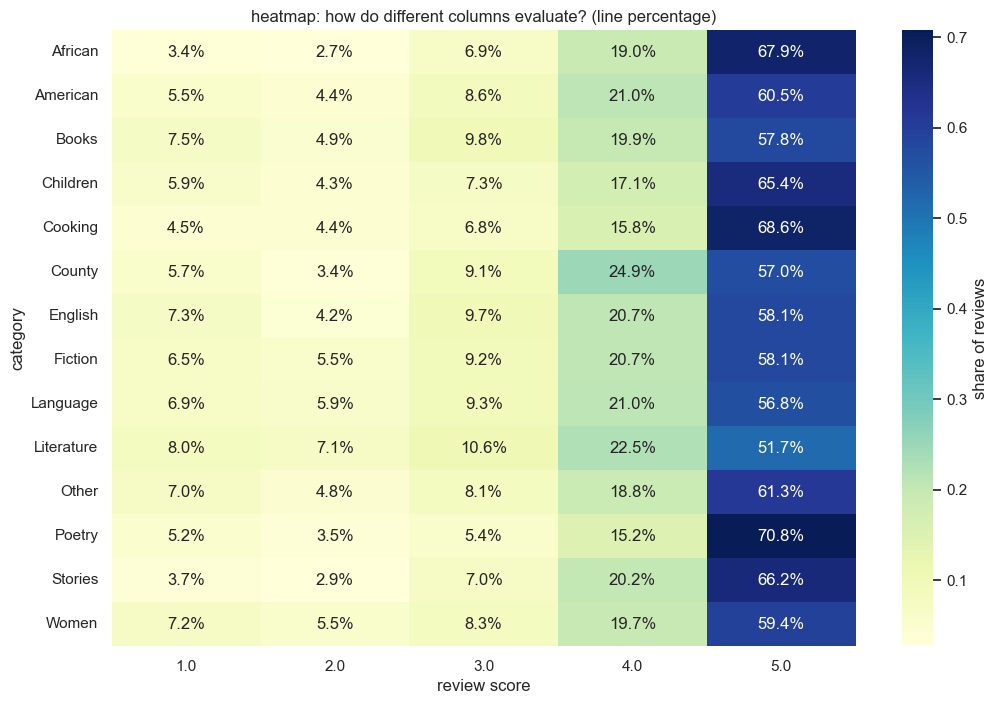

In [7]:
# in this plot we will take a closer look at the dataset using a heatmap

# firstly the two datasets are being merged in a "super_category", the join is being made on the category "title"
df_merged = pd.merge(df2[['Title', 'review/score']],
                     df1[['Title', 'super_category']],
                     on='Title',
                     how='inner')

# the top categories are being filtered. in this case we take to top 15 in order to not overload the heatmap
top_cats = df_merged['super_category'].value_counts().head(15).index
df_filtered = df_merged[df_merged['super_category'].isin(top_cats)]

# now we create a cross-tabulation table (normalized to row percentages); normalize="index" describes that every category (line) adds up to 100
crosstab = pd.crosstab(df_filtered['super_category'], df_filtered['review/score'], normalize='index')

# # creating plot content as well as plot description
plt.figure(figsize=(12, 8))
# using 'YlGnBu' as colortheme: yellow means little, dark blue a lot
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt=".1%", cbar_kws={'label': 'share of reviews'})
plt.title('heatmap: how do different columns evaluate? (line percentage)')
plt.ylabel('category')
plt.xlabel('review score')
plt.yticks(rotation=0)
plt.show()

# Free up memory
del df_merged, df_filtered

### Interpretation: Relationship between category and rating
This heatmap visualizes the percentage distribution of review scores (from 1.0 to 5.0) across various categories. Each row sums to approximately 100% (row percentage), with color indicating the density of reviews (light yellow = low share, dark blue = high share).

* **Dominance of positive reviews: (positive bias):** The overwhelming majority of reviews fall into the 5.0 range, which is evident from the dark blue coloring in the right column. Shares here range from 51.7% (Literature) up to 70.8% (Poetry).
* **Low share of negative reviews:**
    * **Reviews from 1.0 to 3.0 are relatively rare across all categories, indicated by the light yellow hues. Values here are mostly in the single-digit percentage range.
* **Category-specific differences:**
    *   "Poetry" has the highest share of 5.0 reviews at 70.8%.
    * "Literature" shows a comparatively broader distribution with the "lowest" share of 5.0 reviews (51.7%) and higher values at 3.0 (10.6%) and 4.0 (22.5%) compared to other categories.
* **Methodological note:** Alternatively, correlation analyses (e.g., point-biserial correlation for text length vs. rating) or predictive models (logistic regression to predict negative reviews) could have been used. We opted for the heat map because it provides the most intuitive visual representation of the qualitative differences in rating behavior between genres.

### Summary
Exploratory Data Analysis (EDA): Books & Ratings <br>
This notebook documents the detailed analysis of the datasets `books_data` and `Books_rating`.

**The goal of the analysis** is to develop a deep understanding of the available data. This includes:
* **Data structure & quality:** Identification of missing values, data types, and necessary cleaning steps.
* **Distributions:** Statistical analysis of ratings, categories, and user behavior.
* **Correlations:** Analysis of interactions between different features (e.g., category vs. rating).
* **Content anomalies:** Qualitative examination of review texts using text mining methods.

The findings serve as the foundation for further project steps and the development of data-driven models.

Analyze 472443 reviews with pricetag (< 100).


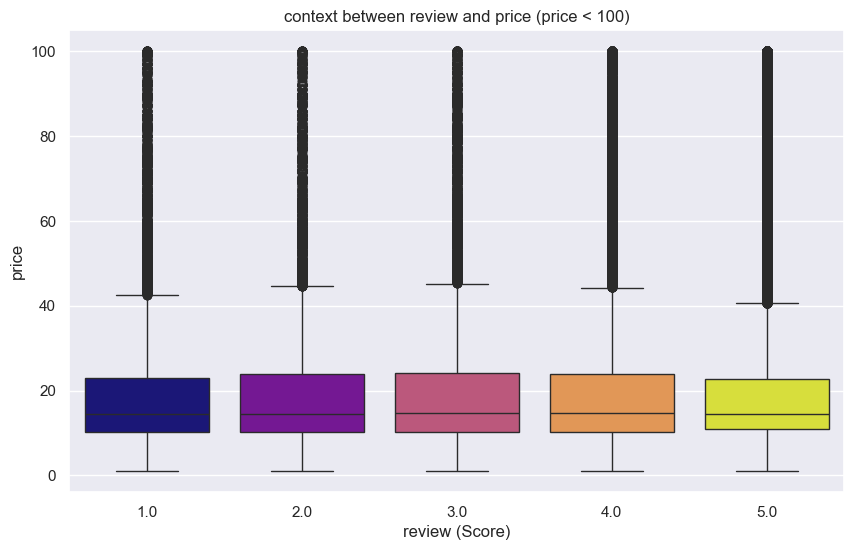

In [13]:
# compare price and review --> firstly filter expensive books (>$100); secondly remove NaN-values

df_price_analysis = df2.dropna(subset=['Price'])
df_price_filtered = df_price_analysis[df_price_analysis['Price'] < 100]

print(f"Analyze {len(df_price_filtered)} reviews with pricetag (< 100).")

plt.figure(figsize=(10, 6))
sns.boxplot(x='review/score', y='Price', data=df_price_filtered, palette='plasma', hue='review/score', legend=False)
plt.title('context between review and price (price < 100)')
plt.xlabel('review (Score)')
plt.ylabel('price')
plt.show()

# free up memory
del df_price_analysis, df_price_filtered

### Interpretation: correlation between price and review
* there is no correlation between price and review
* the distribution is almost the same. There are cheaper and more expensive books in each ranking category
* a higher price will not give you a hint whether the book is better or maybe even worse.

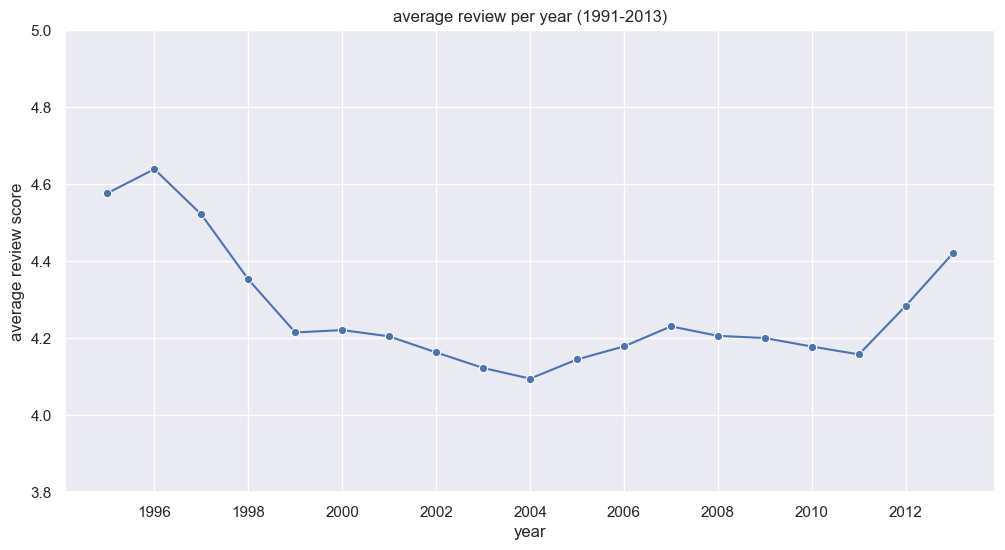

In [15]:
# evaluation of reviews over time (after 1990, reasoning see above)

df_time_score = df2[(df2['review_year'] > 1990) & (df2['review_year'] < 2014)]

# avg review/ year
avg_score_per_year = df_time_score.groupby('review_year')['review/score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='review_year', y='review/score', data=avg_score_per_year, marker='o')
plt.title('average review per year (1991-2013)')
plt.xlabel('year')
plt.ylabel('average review score')
plt.ylim(3.8, 5.0)
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

# free up memory
del df_time_score, avg_score_per_year

### Interpretation: average review score over the years
* the average review scores were not stable over time but varying
* right from the start of the plot, reviews scores were a lot higher than in the following years
* meeting its lowest point in 2014, the scores recovered slowly and suddenly took off in 2011 and the following years
* there are multiple possible reasons:
    * a change in expectation
    * a change in the valuation system

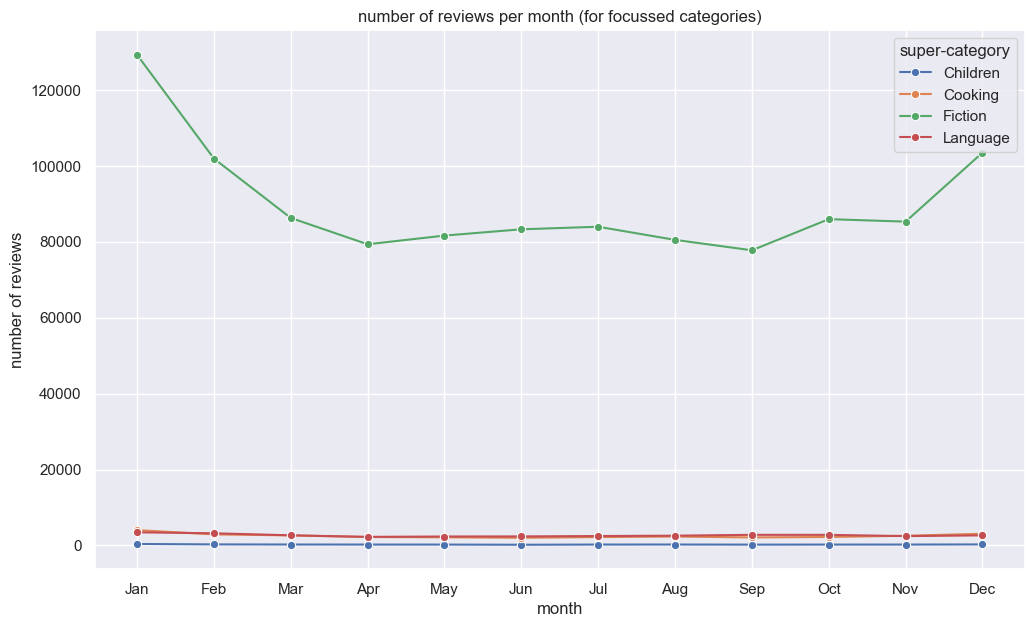

In [20]:
# analyzing for seasonal peaks (using the super_category)
# firstly merge data to combine categories and months

df_merged_seasonal = pd.merge(df2[['Title', 'review_month']],
                              df1[['Title', 'super_category']],
                              on='Title',
                              how='inner')

# count reviews/ month and category
seasonal_activity = df_merged_seasonal.groupby(['review_month', 'super_category']).size().reset_index(name='review_count')

# focus on interesting categories (adjustable!!!)
# all_cats = ['American', '(Fictitious', 'Character)', 'Fiction', 'Literature', 'County', 'Language', 'Stories', 'Poetry', 'English', 'Cooking', 'Children', 'African', 'Women', 'Battle']
focus_cats = ['Cooking', 'Fiction', 'Language', 'Children']
seasonal_filtered = seasonal_activity[seasonal_activity['super_category'].isin(focus_cats)]

plt.figure(figsize=(12, 7))
sns.lineplot(x='review_month', y='review_count', hue='super_category', data=seasonal_filtered, marker='o')
plt.title('number of reviews per month (for focussed categories)')
plt.xlabel('month')
plt.ylabel('number of reviews')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='super-category')
plt.grid(True)
plt.show()

# free up memory
del df_merged_seasonal, seasonal_activity, seasonal_filtered

### Interpretation: are reviews differing per season?
* the reviews regarding cooking are way above in respect of fiction, children and language
* speaking for cooking: at the start and end of a year there are tremendously more reviews than in the middle of the year
* this could be reasoned with the holiday season as well as new years resolutions

Analyzing 1642806 reviews from 317 publisher.


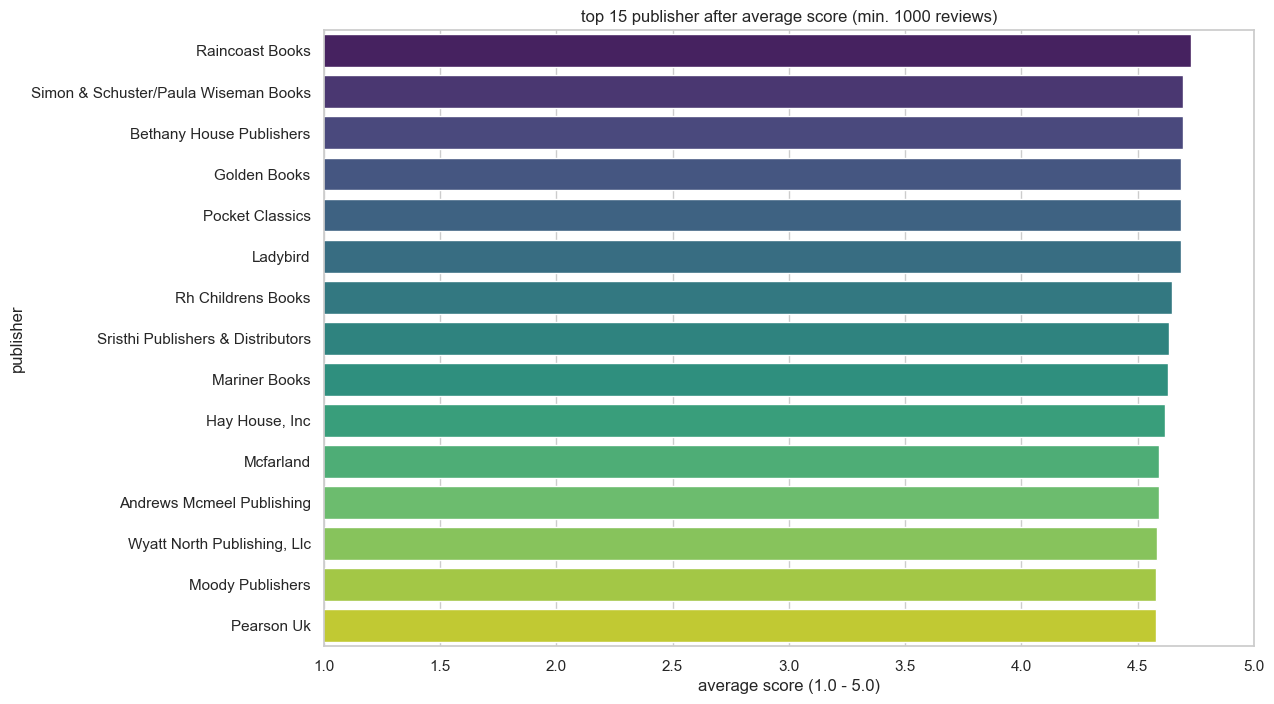

In [26]:
# searching for a connection between publisher and reviews --> merging publisher info with scores

df_merged_pub = pd.merge(df2[['Title', 'review/score']],
                         df1[['Title', 'publisher']],
                         on='Title',
                         how='inner')

# clean-up publisher-information
df_merged_pub.dropna(subset=['publisher'], inplace=True)
df_merged_pub['publisher_clean'] = df_merged_pub['publisher'].str.strip().str.title()

# count how often a publisher was reviewed
publisher_counts = df_merged_pub['publisher_clean'].value_counts()

# filtering publisher --> less than 1k reviews wont be plotted --> adjustable!
significant_publishers = publisher_counts[publisher_counts > 1000].index
df_filtered_pub = df_merged_pub[df_merged_pub['publisher_clean'].isin(significant_publishers)]

print(f"Analyzing {len(df_filtered_pub)} reviews from {len(significant_publishers)} publisher.")

# calc avg review score/ publisher
publisher_avg_score = df_filtered_pub.groupby('publisher_clean')['review/score'].mean().sort_values(ascending=False)

# top 15 publisher
top_publishers = publisher_avg_score.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette='viridis', hue=top_publishers.index, legend=False)
plt.title('top 15 publisher after average score (min. 1000 reviews)')
plt.xlabel('average score (1.0 - 5.0)')
plt.ylabel('publisher')
# plt.xlim(3.8, 4.5) # limit
plt.xlim(1.0, 5.0)
plt.show()

# free up memory
del df_merged_pub, df_filtered_pub, publisher_counts

### Interpretation: best publisher in regard the review-scores
* among the best 15 publishers there is only very little variance

number of usefull reviews (ratio > 0.8): 29793
number of non-usefull reviews (ratio < 0.2): 8107


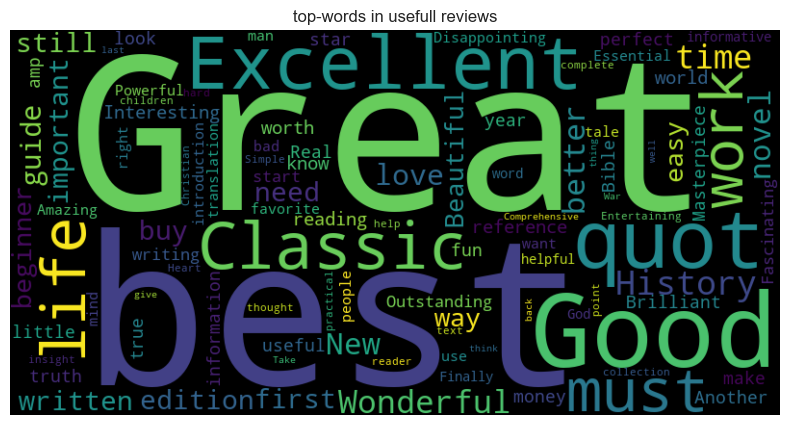

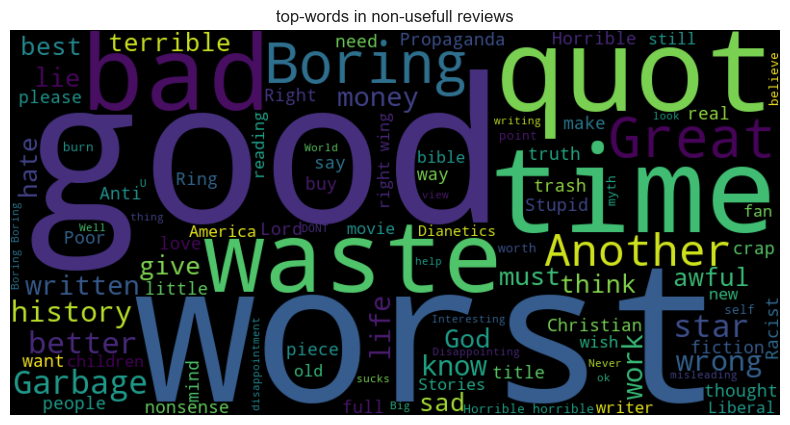

In [29]:
# analyzing usefully comments (votes > 50)
df_helpful_analysis = df2[df2['total_votes'] > 50].copy()

# define usefull and non-usefull
helpful_reviews = df_helpful_analysis[df_helpful_analysis['helpfulness_ratio'] > 0.8]
unhelpful_reviews = df_helpful_analysis[df_helpful_analysis['helpfulness_ratio'] < 0.2]

print(f"number of usefull reviews (ratio > 0.8): {len(helpful_reviews)}")
print(f"number of non-usefull reviews (ratio < 0.2): {len(unhelpful_reviews)}")

# update stopwords
my_stopwords.update(["book", "read", "story", "author", "really", "even", "much", "review", "books"])

# wordcloud for usefully reviews
if not helpful_reviews.empty:
    plot_wordcloud(helpful_reviews['review/summary'],
                   'top-words in usefull reviews')
else:
    print("found no usefull reviews")

# wordcloud for non-usefully reviews
if not unhelpful_reviews.empty:
    plot_wordcloud(unhelpful_reviews['review/summary'],
                   'top-words in non-usefull reviews')
else:
    print("found no non-usefull reviews")

# free up memory
del df_helpful_analysis, helpful_reviews, unhelpful_reviews

### Interpretation: wordclouds for (non-)usefull reviews
* words in the clouds are pretty much as expected

compare 385310 relevant reviews from power- vs. normal-users.


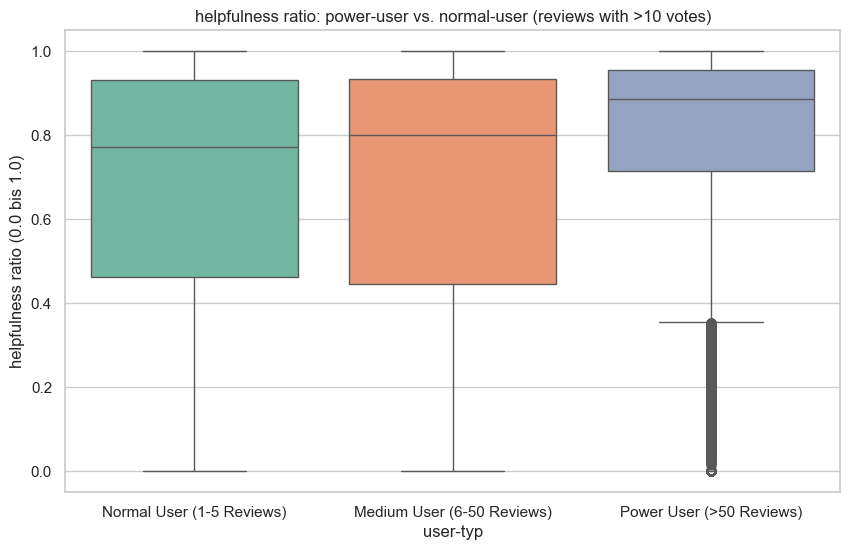


--- average helpfulness (helpfulness ratio) ---
user_type
Medium User (6-50 Reviews)    0.680700
Normal User (1-5 Reviews)     0.679454
Power User (>50 Reviews)      0.792615
Name: helpfulness_ratio, dtype: float64


In [30]:
# how usefull are comments from power-users
user_activity = df2['User_id'].value_counts()

# define threshold: > 50
# normal-user: <= 5 reviews
power_user_threshold = 50
power_user_ids = user_activity[user_activity > power_user_threshold].index
normal_user_ids = user_activity[(user_activity >= 1) & (user_activity <= 5)].index

# add user_type as column in copied version of df2
df_user_analysis = df2.dropna(subset=['User_id']).copy()

def categorize_user(user_id):
    if user_id in power_user_ids:
        return 'Power User (>50 Reviews)'
    elif user_id in normal_user_ids:
        return 'Normal User (1-5 Reviews)'
    else:
        return 'Medium User (6-50 Reviews)'

df_user_analysis['user_type'] = df_user_analysis['User_id'].apply(categorize_user)

# considering helpfulness ratio
df_user_analysis_filtered = df_user_analysis[
    (df_user_analysis['total_votes'] > 10) &
    (df_user_analysis['user_type'] != 'Medium User') # only compare extreme values
]

print(f"compare {len(df_user_analysis_filtered)} relevant reviews from power- vs. normal-users.")

plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='helpfulness_ratio', data=df_user_analysis_filtered, palette='Set2', hue='user_type', legend=False)
plt.title('helpfulness ratio: power-user vs. normal-user (reviews with >10 votes)')
plt.xlabel('user-typ')
plt.ylabel('helpfulness ratio (0.0 bis 1.0)')
plt.show()

# summary
print("\n--- average helpfulness (helpfulness ratio) ---")
print(df_user_analysis_filtered.groupby('user_type')['helpfulness_ratio'].mean())

# free up memory
del df_user_analysis, df_user_analysis_filtered, user_activity

### interpretation: usefulness ratio (power users vs. normal users)

* on average, the usefulness of a review increases with the experience of the author.
* the median usefulness (white line) is highest among “power users” (>50 reviews) at approximately 88%, compared to “medium users” (approximately 80%) and “normal users” (approximately 78%).
* **Distribution (power users):** The distribution among power users is highly polarized.
* The “typical” review (the box) is rated as very useful (the middle 50% range between ~72% and 95%).
    * At the same time, however, there is also a long “tail” at the bottom (the lower whisker) and a cluster of outliers (gray dots) that were rated as **very unhelpful** (down to 0.0).
* **Distribution (other users):** For “normal users” and “medium users,” the spread of “typical” ratings (the boxes) is much wider.

**Conclusion:** Power users tend to write the most helpful reviews. However, they also produce a significant number of reviews that are considered not helpful at all – an “all-or-nothing” phenomenon that is less pronounced in the other groups.

In [32]:
# find controversial books
# firstly aggregate df2 after book title
book_stats = df2.groupby('Title').agg(
    review_count=('review/score', 'size'),
    avg_score=('review/score', 'mean')
).reset_index()

# define threshold
count_threshold = 500  # at least 500 reviews
score_min = 2.5        # avg. score between...
score_max = 3.5        # ...and at highest

# filter
controversial_books = book_stats[
    (book_stats['review_count'] > count_threshold) &
    (book_stats['avg_score'] >= score_min) &
    (book_stats['avg_score'] <= score_max)
]

# sort after most reviews
controversial_books = controversial_books.sort_values(by='review_count', ascending=False)

print(f"\n--- top 15 controversial books (score 2.5-3.5, >{count_threshold} reviews) ---")
print(controversial_books.head(15).to_markdown(index=False))

# free up memory
del book_stats, controversial_books


--- top 15 controversial books (score 2.5-3.5, >500 reviews) ---
| Title                                                                                 |   review_count |   avg_score |
|:--------------------------------------------------------------------------------------|---------------:|------------:|
| Unfit for Command: Swift Boat Veterans Speak Out Against John Kerry                   |           3025 |     3.48959 |
| Hannibal                                                                              |           2797 |     3.0404  |
| Hannibal (Hannibal Lecter)                                                            |           2793 |     3.03938 |
| Who Moved My Cheese? An-Amazing Way to Deal with Change in Your Work and in Your Life |           1882 |     3.33422 |
| Path of Daggers (Wheel of Time 08)                                                    |           1840 |     2.84891 |
| A Feast for Crows (A Song of Ice and Fire, Book Four)                                

|   super_category |   count |
|-----------------:|--------:|
|                1 |  870423 |
|                2 |  116377 |
|                3 |   18587 |
|                4 |    2372 |
|                5 |     667 |
|                6 |     282 |
|                7 |     131 |
|                8 |      64 |
|                9 |      40 |
|               10 |      18 |


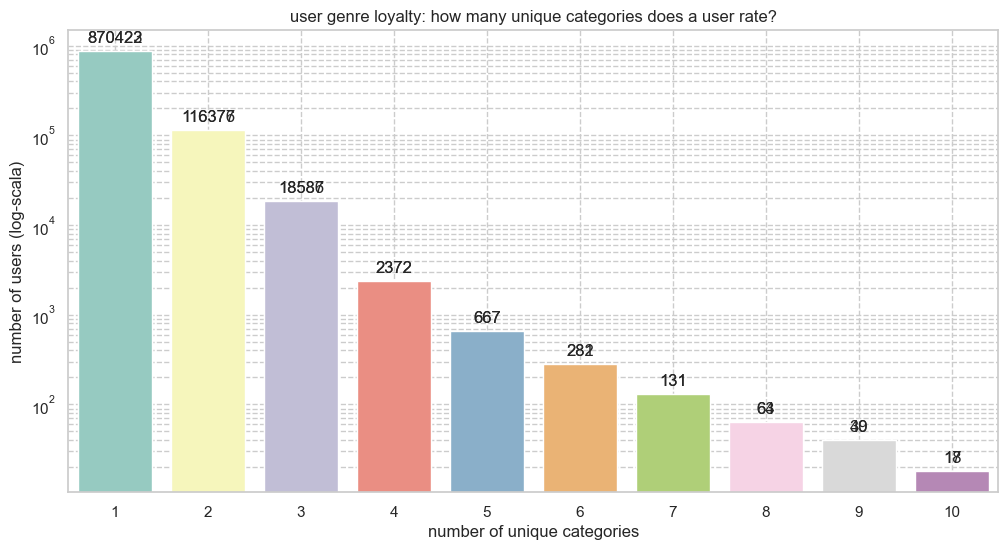

In [36]:
# how much variance in genre per user?
try:
    # merge user_id and super_category
    df_merged_genre = pd.merge(df2[['User_id', 'Title']],
                               df1[['Title', 'super_category']],
                               on='Title',
                               how='inner')

    df_merged_genre.dropna(subset=['User_id', 'super_category'], inplace=True)

    # count unique user per category
    user_category_diversity = df_merged_genre.groupby('User_id')['super_category'].nunique()

    # how many users have reviewed multiple categories
    diversity_counts = user_category_diversity.value_counts().sort_index()

    print(diversity_counts.head(10).to_markdown(floatfmt=".0f"))

    # plot
    plt.figure(figsize=(12, 6))
    # only the top 10 for visibility --> adjustable!
    plot_data = diversity_counts.head(10)

    ax = sns.barplot(x=plot_data.index, y=plot_data.values, palette='Set3', hue=plot_data.index, legend=False)
    ax.set_yscale("log")

    #barplot
    ax = sns.barplot(x=plot_data.index, y=plot_data.values, palette='Set3', hue=plot_data.index, legend=False, log=True)
    plt.title('user genre loyalty: how many unique categories does a user rate?')
    plt.xlabel('number of unique categories')
    plt.ylabel('number of users (log-scala)')
    plt.grid(True, which="both", ls="--")

    # add values to each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    plt.show()

    # free up memory
    del df_merged_genre, user_category_diversity, diversity_counts, plot_data

except Exception as e:
    print(f"error: {e}")

### Interpretation: User genre loyalty (logarithmic view)

* **Key finding:** The **overwhelming majority** of users are extremely specialized or “genre loyal”
* **Logarithmic scale:** The Y-axis is logarithmic (“log-scale”). This means that the decline in user numbers is **exponential** and much more drastic than it would appear on a linear scale
* **Data in detail:**
* **870,422 users** (by far the largest bar) rate articles from only **a single category**
    * The number drops dramatically to **116,376 users** for two categories
* For three categories, there are only 18,587 users
* **Conclusion:** The typical user focuses on a single area of interest. Users who spread their ratings across many (e.g., 4 or more) categories are extremely rare

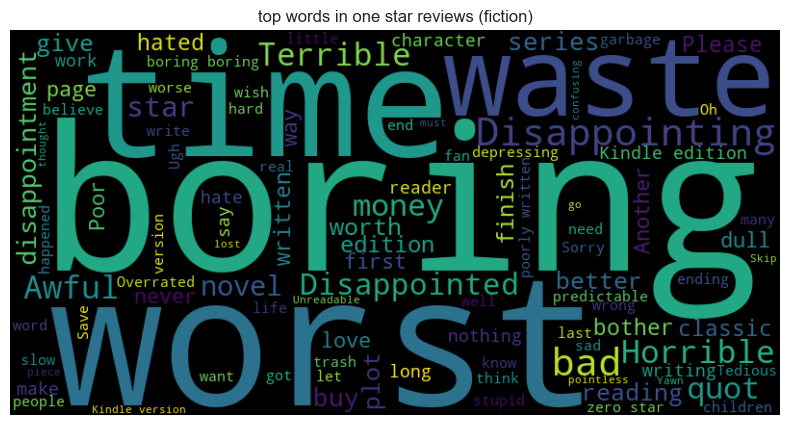

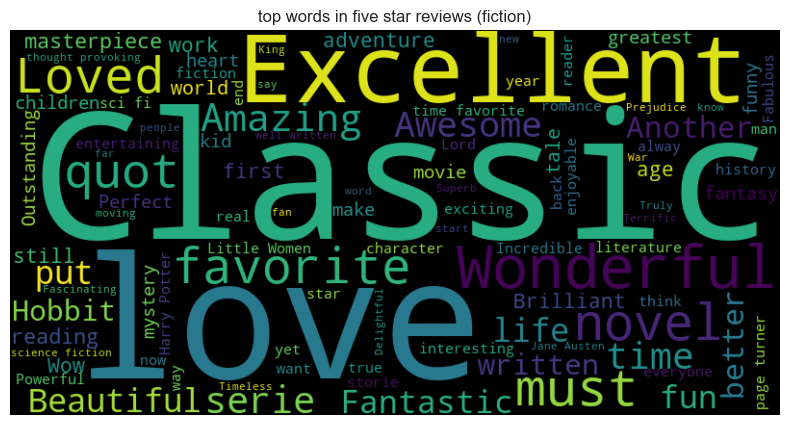

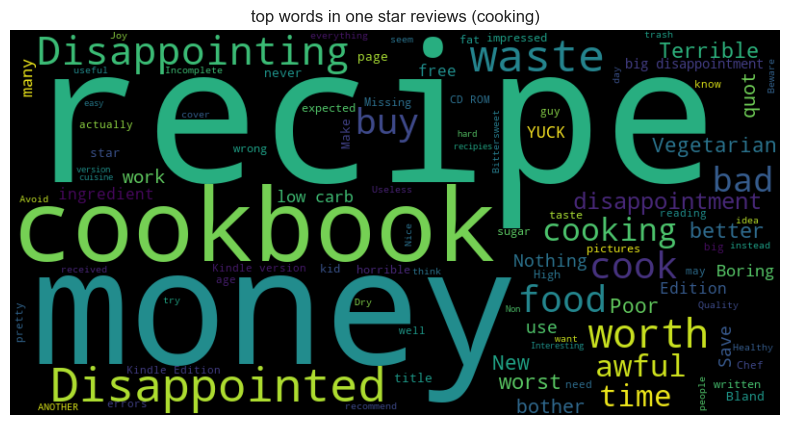

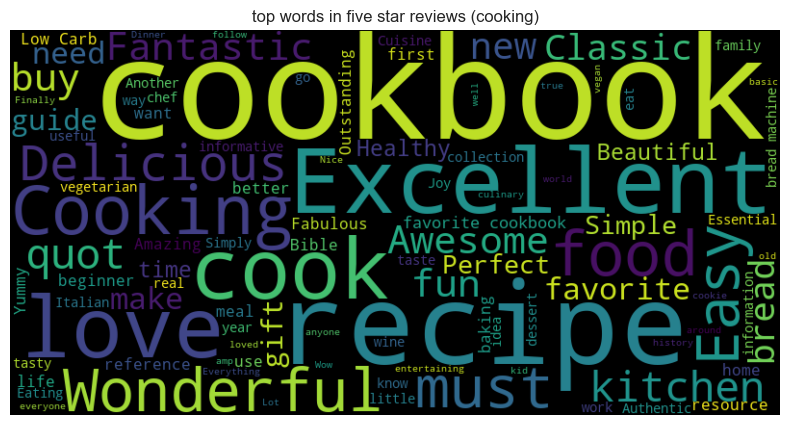

In [38]:
# keywords per genre

# update stopwords
my_stopwords = set(STOPWORDS)
my_stopwords.update(["book", "read", "one", "will", "story", "author", "really", "even", "much", "review", "books", "great", "best", "good", "like"])

def plot_wordcloud(text_data, title):
    try:
        full_text = " ".join(text_data.dropna().astype(str))
        if not full_text.strip():
            print(f"found no words for wordcloud: {title}")
            return

        wc = WordCloud(background_color='black',
                       stopwords=my_stopwords,
                       width=800, height=400,
                       max_words=100,
                       colormap='viridis').generate(full_text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.show()
    except Exception as e:
        print(f"error while creating wordcloud '{title}': {e}")

try:
    # merge scores and categories
    df_merged_wc = pd.merge(df2[['Title', 'review/score', 'review/summary']],
                            df1[['Title', 'super_category']],
                            on='Title',
                            how='inner')

    # word cloud for fiction
    df_fiction = df_merged_wc[df_merged_wc['super_category'] == 'Fiction']
    fiction_1star = df_fiction[df_fiction['review/score'] == 1.0]['review/summary']
    fiction_5star = df_fiction[df_fiction['review/score'] == 5.0]['review/summary']

    if not fiction_1star.empty:
        plot_wordcloud(fiction_1star, 'top words in one star reviews (fiction)')
    else:
        print("found no one star reviews")

    if not fiction_5star.empty:
        plot_wordcloud(fiction_5star, 'top words in five star reviews (fiction)')
    else:
        print("found no five star reviews")

    # word cloud for cooking
    df_cooking = df_merged_wc[df_merged_wc['super_category'] == 'Cooking']
    cooking_1star = df_cooking[df_cooking['review/score'] == 1.0]['review/summary']
    cooking_5star = df_cooking[df_cooking['review/score'] == 5.0]['review/summary']

    if not cooking_1star.empty:
        plot_wordcloud(cooking_1star, 'top words in one star reviews (cooking)')
    else:
        print("found no one star reviews")

    if not cooking_5star.empty:
        plot_wordcloud(cooking_5star, 'top words in five star reviews (cooking)')
    else:
        print("found no five star reviews")

    # Speicher freigeben
    del df_merged_wc, df_fiction, fiction_1star, fiction_5star, df_cooking, cooking_1star, cooking_5star

except Exception as e:
    print(f"error: {e}")

### Interpretation of wordclouds for two choosen categories:
* again very much as expected